### Simple linear regression   

### Co2 emmision estimstion

### import required library

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
data  = pd.read_csv("CO2 Emissions_Canada.csv")


In [18]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data exploration

In [19]:
#descriptive exploration on our data
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [20]:
#select some features to explore more 
df  = data[["Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)","CO2 Emissions(g/km)"]]

In [21]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


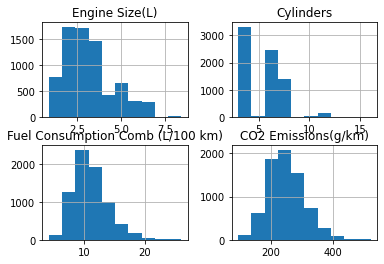

In [22]:
#plot each of this features
viz = df[["Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)","CO2 Emissions(g/km)"]]
viz.hist()
plt.show()

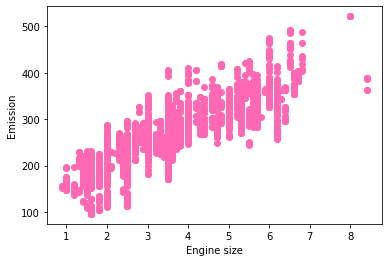

In [27]:
#let's plot each of these features against the Emission, to see how linear their relationship is
plt.scatter(df['Engine Size(L)'],df['CO2 Emissions(g/km)'],color = "hotpink")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

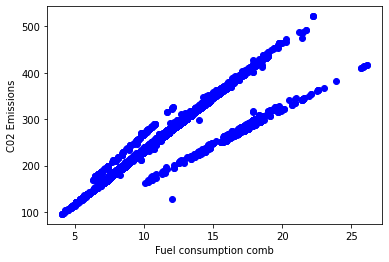

In [29]:
plt.scatter(df["Fuel Consumption Comb (L/100 km)"],df["CO2 Emissions(g/km)"],color = "blue")
plt.xlabel("Fuel consumption comb")
plt.ylabel("C02 Emissions")
plt.show()

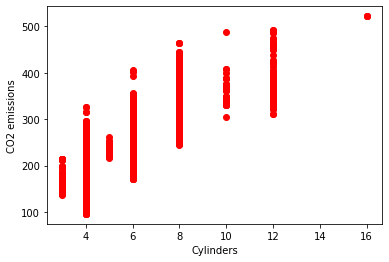

In [30]:
plt.scatter(df["Cylinders"],df["CO2 Emissions(g/km)"],color="red")
plt.xlabel("Cylinders")
plt.ylabel("CO2 emissions")
plt.show()

### modeling

In [64]:
#assign dependent and independent variable
x = df[["Engine Size(L)"]]
y = df[["CO2 Emissions(g/km)"]]

In [65]:
#split the data
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =0)

In [67]:
#import linear regression
from sklearn.linear_model import LinearRegression

In [68]:
lr  = LinearRegression()

In [77]:
#fit the model
lr.fit(x_train,y_train)
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[36.67331777]]
Intercept:  [134.61076371]


In [78]:
y_predict = lr.predict(y_test)

In [79]:
y_predict

array([[ 8972.88034553],
       [ 8532.80053233],
       [ 9412.96015873],
       ...,
       [11686.70586028],
       [10256.44646737],
       [ 9046.22698106]])

In [80]:
y_pred = lr.predict([[2.0]])

In [81]:
y_pred

array([[207.95739924]])

### Evaluation

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.


In [82]:
print(f"Mean absolute error: {np.mean(np.absolute(y_test-y_predict))}")

Mean absolute error: CO2 Emissions(g/km)    9097.671881
dtype: float64


Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones

In [86]:
print(f"Mean Squared Error: {np.mean(y_test-y_predict)**2}")

Mean Squared Error: CO2 Emissions(g/km)    8.276763e+07
dtype: float64


R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [89]:
from sklearn.metrics import r2_score
print(f"R2 score: {r2_score(y_test,y_predict)}")

R2 score: -25255.760583591007


In [91]:
np.round(lr.score(x_test,y_test)*100,2)

72.61